In [1]:
! pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.0 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12551 sha256=e019b7e3c72180967c7191b7faf5637b26aa25cc8fed6b6c5db5f21933699ac1
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us


CLUSTERING


In [2]:
# importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy import stats
import us
import plotly.express as px
from plotly .subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

In [3]:
# defining required function
# normalization function
def norm_func(i):
 x=(i-i.min())/(i.max()-i.min())
 return(x)

In [4]:
scalar = StandardScaler

DATA - CRIME

In [5]:
#load dataset
data1=pd.read_csv("/content/crime_data.csv", index_col=0)

In [6]:
data1.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


About the Dataset

 Murder -- Muder rates in different places of United States
 Assualt- Assualt rate in different places of United States
 UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [8]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


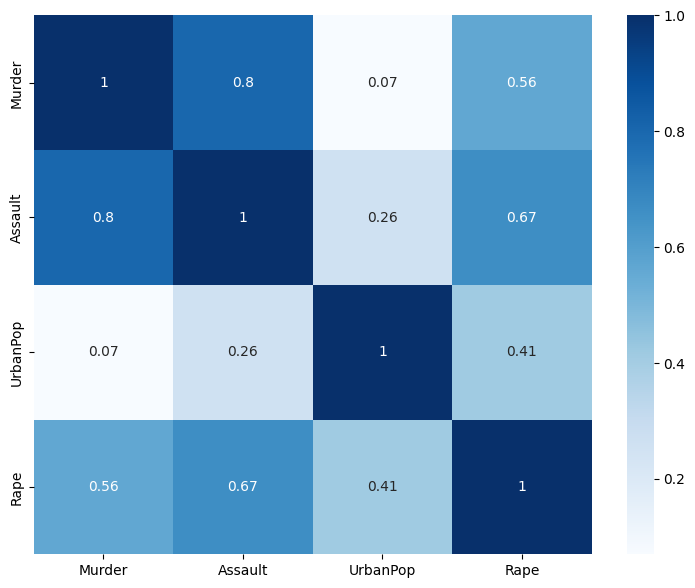

In [9]:
plt.figure(figsize=(9,7))
sns.heatmap(data1.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

Hierachical Clustering

In [10]:
# craet a copy of data
data1_hc = data1.copy()

In [11]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
# normalizing data frame
df_norm=norm_func(data1_hc.iloc[:,1:])
df_norm


,Assault,UrbanPop,Rape
Alabama,0.654110,0.440678,0.359173
Alaska,0.746575,0.271186,0.961240
Arizona,0.852740,0.813559,0.612403
Arkansas,0.496575,0.305085,0.315245
California,0.791096,1.000000,0.860465
Colorado,0.544521,0.779661,0.811370
Connecticut,0.222603,0.762712,0.098191
Delaware,0.660959,0.677966,0.219638
Florida,0.993151,0.813559,0.635659
Georgia,0.568493,0.474576,0.478036


seeing at the dendogram we can select numbeer of cluster as 4

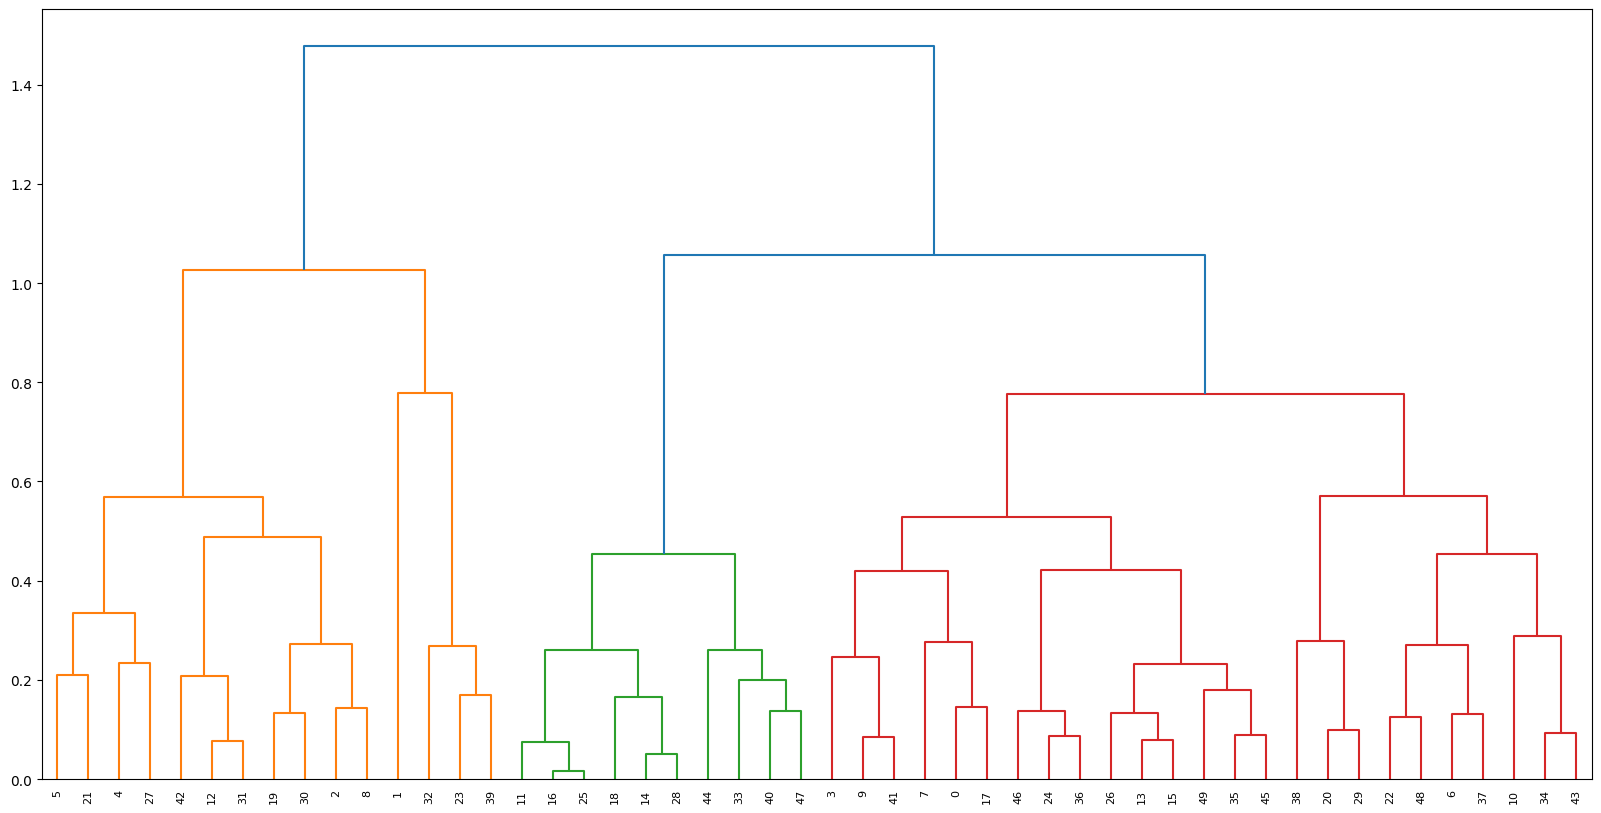

In [15]:
# creat dendrogram
plt.figure(figsize=(20,10))
dendrogram1=sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [16]:
# create clusters
hc1=AgglomerativeClustering(n_clusters=4,affinity = "euclidean",linkage="complete")
hc1.fit(df_norm)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [17]:
# saving the clusters
y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([1, 0, 3, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 3,
       1, 0, 1, 2, 1, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1,
       2, 1, 1, 2, 1, 1])

In [18]:
# adding the clusters to the dataframe
data1_hc['clusterID_hc']=y_hc1
data1_hc

,Murder,Assault,UrbanPop,Rape,clusterID_hc
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,1


In [19]:
# number of datapoints for each clusters
data1_hc['clusterID_hc'].value_counts()

1    25
3    11
2    10
0     4
Name: clusterID_hc, dtype: int64

In [20]:
data1_clustered1 = data1_hc.sort_values("clusterID_hc")
data1_clustered1.iloc[:,[-1]]


,clusterID_hc
Alaska,0
Mississippi,0
South Carolina,0
North Carolina,0
Alabama,1
Wisconsin,1
Nebraska,1
New Jersey,1
Ohio,1
Oklahoma,1


K- Means Clustering

In [21]:
# creating a copy
data1_km = data1.copy()

In [22]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [23]:
df_norm=norm_func(data1_km.iloc[:,1:])

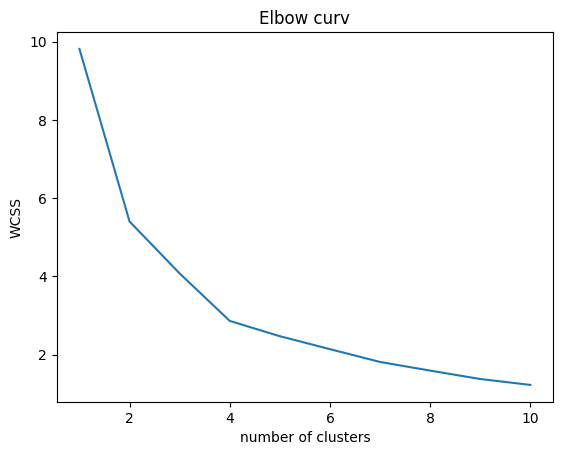

In [24]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

looking at the curve we may conclude that the number of cluster shall be takes as 4

In [25]:
# build cluster algorithum
clusters_new1 = KMeans(n_clusters=4,random_state=42)
clusters_new1.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [26]:
clusters_new1.labels_

array([2, 0, 0, 2, 0, 0, 3, 2, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [27]:
# assign clusters to the dataset
data1_km["clusterID_km"]=clusters_new1.labels_
data1_km


,Murder,Assault,UrbanPop,Rape,clusterID_km
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2


In [28]:
# number of data point for ecah cluster
data1_km['clusterID_km'].value_counts()

3    17
1    13
0    11
2     9
Name: clusterID_km, dtype: int64

In [29]:
df1_clustered2 = data1_km.sort_values("clusterID_km")
df1_clustered2.iloc[:,[-1]]

,clusterID_km
Illinois,0
Alaska,0
Arizona,0
California,0
Colorado,0
Michigan,0
Florida,0
Nevada,0
Maryland,0
New Mexico,0


DBSCAN

In [30]:
# CREAT A COPY
data1_db=data1.copy()

In [31]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [32]:
df_norm=norm_func(data1_db.iloc[:,1:])

In [33]:
#creating clusters
dbscan1 = DBSCAN(eps=5, min_samples=8)
dbscan1.fit(df_norm)

DBSCAN(eps=5, min_samples=8)

In [34]:
#Noicy samples are given the label -1
dbscan1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [35]:
#assign clusters to the dataset
data1_db["clusterID_db"] = dbscan1.labels_
data1_db.head()

,Murder,Assault,UrbanPop,Rape,clusterID_db
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [36]:
#number of datapoints for each clusters
data1_db["clusterID_db"].value_counts()

0    50
Name: clusterID_db, dtype: int64

In [37]:
df1_clustered3 = data1_db.sort_values("clusterID_db")
df1_clustered3.iloc[:,[-1]]

,clusterID_db
Alabama,0
Nevada,0
New Hampshire,0
New Jersey,0
New Mexico,0
New York,0
North Carolina,0
North Dakota,0
Ohio,0
Oklahoma,0


Here, all the data points are held under a single cluster, hence DBSCAN is not an appropriate method for clustering for this dataset.
The 2nd record is noisy

In [38]:
#Comparing the clusters from various methods
km1 = data1_km["clusterID_km"]
db1 = data1_db["clusterID_db"]
hc1 = data1_hc['clusterID_hc']
final1 = pd.concat([km1, hc1, db1], axis=1)
final1

,clusterID_km,clusterID_hc,clusterID_db
Alabama,2,1,0
Alaska,0,0,0
Arizona,0,3,0
Arkansas,2,1,0
California,0,3,0
Colorado,0,3,0
Connecticut,3,1,0
Delaware,2,1,0
Florida,0,3,0
Georgia,2,1,0


Visualizing Clusters

In [39]:
plot_data = final1.reset_index()
plot_data.head()

,index,clusterID_km,clusterID_hc,clusterID_db
0,Alabama,2,1,0
1,Alaska,0,0,0
2,Arizona,0,3,0
3,Arkansas,2,1,0
4,California,0,3,0


In [40]:
states1 = us.states.mapping('name','abbr')

In [41]:
codes = plot_data['index'].map(lambda x: states1.get(x, x))
plot_data['StateCode'] = codes
plot_data.head()

,index,clusterID_km,clusterID_hc,clusterID_db,StateCode
0,Alabama,2,1,0,AL
1,Alaska,0,0,0,AK
2,Arizona,0,3,0,AZ
3,Arkansas,2,1,0,AR
4,California,0,3,0,CA


In [42]:
# Plot
fig_t1 = px.choropleth(plot_data,
                    locations='StateCode',
                    locationmode="USA-states",
                    scope='usa',
                    color='clusterID_hc',
                    color_continuous_scale="Viridis_r",

                    )
fig_t2 = px.choropleth(plot_data,
                    locations='StateCode',
                    locationmode="USA-states",
                    scope='usa',
                    color='clusterID_km',
                    color_continuous_scale="Viridis_r",

                    )
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Hierarchical Clustering', 'K-means Clustering'],
                    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]])

fig.add_trace(fig_t1['data'][0], row=1, col=1)
fig.add_trace(fig_t2['data'][0], row=1, col=2)

#fig.update_layout(coloraxis_showscale=False) # update
fig.update_geos(fitbounds="locations", visible=True)

fig.update_layout(title_text='Clusters using different Methods', #geo_scope='usa',
                  margin={'l': 0, 'r': 0, 't': 200, 'b': 0},
                  height=500)

fig.show()